In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [2]:
graph = nx.read_graphml("../../../Starspace/data/oms/cat_hier_graph.graphml")

In [3]:
root = [n for n in graph.nodes() if len(list(graph.predecessors(n)))==0][0]

In [4]:
root

'science'

In [5]:
visited = Counter() 
traversal = []
new_edges = []
queue = [] 

s = root
queue.append(s) 
visited[s]+=1

while queue: 

    s = queue.pop(0) 
    traversal.append(s)

    for i in graph.neighbors(s): 
        queue.append(i) 
        visited[i] +=1
        if visited[i] != 1:
            pass
        else:
            new_edges.append((s, i))

In [6]:
dag2tree = nx.DiGraph()

In [7]:
dag2tree.add_edges_from(new_edges)

In [8]:
dag2tree.size(), graph.size()

(55256, 60793)

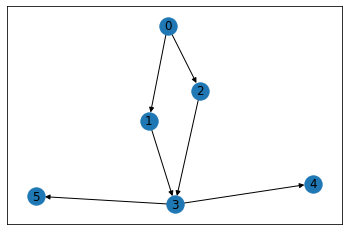

In [11]:
nx.draw_networkx(graph_copy, with_labels=True)

In [29]:
copy_edges = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (3, 5)]

In [102]:
# graph_copy = nx.DiGraph()
# graph_copy.add_edges_from(copy_edges)
graph_copy = graph.copy()

In [103]:
root_copy = [n for n in graph_copy.nodes() if len(list(graph_copy.predecessors(n)))==0][0]

In [104]:
visited = Counter() 
traversal = []
new_edges_copy = []
queue = [] 

s = root_copy
queue.append(s) 
visited[s]+=1

while queue: 

    s = queue.pop(0) 
    traversal.append(s)

    for i in graph_copy.neighbors(s): 
        queue.append(i) 
        visited[i] +=1
        if visited[i] != 1:
            aux_node = "{}/{}".format(s, i)

            for dup_edges in graph_copy.neighbors(i):
                new_edges_copy.append((s, aux_node))
                dup_aux_node = "{}/{}".format(aux_node, dup_edges)
                new_edges_copy.append((aux_node, dup_aux_node))
        else:
            new_edges_copy.append((s, i))

In [105]:
new_graph = nx.DiGraph()

In [106]:
new_graph.add_edges_from(new_edges_copy)

In [113]:
new_root = [n for n in new_graph.nodes() if len(list(new_graph.predecessors(n)))==0][0]

In [115]:
nx.write_graphml(new_graph, "oms_2nd_dag2tree.graphml")

In [121]:
def mapping(x):
    return "__label__{}".format(x)

In [122]:
H = nx.relabel_nodes(new_graph, mapping)

In [123]:
nx.write_graphml(H, "oms_2nd_dag2tree_fasttext.graphml")

In [124]:
rev_H = H.reverse(copy=True)

In [126]:
nx.write_edgelist(rev_H, "oms_2nd_dag2tree_fasttext_reverse.txt", delimiter="\t")

In [119]:
depth = Counter()
for node, dist in nx.shortest_path_length(new_graph, 'science').items():
    depth[dist]+=1

In [120]:
depth

Counter({0: 1,
         1: 6,
         2: 53,
         3: 634,
         4: 5249,
         5: 16001,
         6: 29517,
         7: 23413,
         8: 12349,
         9: 5417,
         10: 2911,
         11: 1461,
         12: 1471,
         13: 838,
         14: 435,
         15: 12})